In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TARGET_COLUMN = 'event_name'

### Analysing data

In [3]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              23357 non-null  object
 1   user_state          23286 non-null  object
 2   event_name          23357 non-null  object
 3   event_attributes    23357 non-null  object
 4   event_created_date  23357 non-null  object
 5   event_platform      23357 non-null  object
 6   device_manufacture  15847 non-null  object
 7   device_model        15847 non-null  object
dtypes: object(8)
memory usage: 1.4+ MB


In [4]:
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


In [5]:
df.describe()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
count,23357,23286,23357,23357,23357,23357,15847,15847
unique,3540,49,23,2309,20452,3,22,290
top,627f50253b42607513a1c93bb68201ad,CA,Order,"{""Premium Membership"":""True""}",2022-03-16 08:20:51,ios,Apple,"iPhone12,1"
freq,498,8627,6116,5451,17,9586,9586,1489


### Analysing question

In [6]:
df_subscription_cancel = df[df['event_name'] == 'Subscription Premium Cancel']
df_subscription_cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 438 to 23347
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              271 non-null    object
 1   user_state          271 non-null    object
 2   event_name          271 non-null    object
 3   event_attributes    271 non-null    object
 4   event_created_date  271 non-null    object
 5   event_platform      271 non-null    object
 6   device_manufacture  0 non-null      object
 7   device_model        0 non-null      object
dtypes: object(8)
memory usage: 19.1+ KB


In [7]:
df_user_1e5_history = df[df['userid'] == '1e50975ba98d210cf2d141ec0b7397c1']
df_user_1e5_history

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
381,1e50975ba98d210cf2d141ec0b7397c1,FL,Wallet Opened,{},2022-01-19 05:38:47,ios,Apple,"iPhone13,3"
382,1e50975ba98d210cf2d141ec0b7397c1,FL,Chat Conversation Started,{},2022-01-19 05:39:57,ios,Apple,"iPhone13,3"
438,1e50975ba98d210cf2d141ec0b7397c1,FL,Subscription Premium Cancel,{},2022-01-19 12:52:29,outofband,NaN,NaN


In [8]:
df_user_c54_history = df[df['userid'] == 'c54556dbb037662501bf2f938e6c9fd4']
df_user_c54_history

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
472,c54556dbb037662501bf2f938e6c9fd4,DE,Chat Conversation Started,{},2022-01-19 22:34:19,android,samsung,SM-G991U
474,c54556dbb037662501bf2f938e6c9fd4,DE,Chat Conversation Started,{},2022-01-19 22:36:15,android,samsung,SM-G991U
475,c54556dbb037662501bf2f938e6c9fd4,DE,Chat Conversation Started,{},2022-01-19 22:38:16,android,samsung,SM-G991U
478,c54556dbb037662501bf2f938e6c9fd4,DE,Subscription Premium Cancel,{},2022-01-19 22:42:25,outofband,NaN,NaN
479,c54556dbb037662501bf2f938e6c9fd4,DE,Transaction Refund,"{""Id"":""3064c45c1a47fcc774ff2d3071dd9f08"",""Amou...",2022-01-19 22:43:42,outofband,NaN,NaN


In [9]:
df_user_430_history = df[df['userid'] == '430d96d025d9c30dbd62aa4fd3591e98']
df_user_430_history

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
333,430d96d025d9c30dbd62aa4fd3591e98,CA,Sign Up Success,"{""Method"":""Google""}",2022-01-16 19:22:16,ios,Apple,"iPhone13,4"
334,430d96d025d9c30dbd62aa4fd3591e98,CA,Add Vehicle Success,"{""Make"":""Honda"",""Model"":""Civic"",""Temporary"":""f...",2022-01-16 19:23:22,ios,Apple,"iPhone13,4"
335,430d96d025d9c30dbd62aa4fd3591e98,CA,Add Payment Method Success,"{""Payment Method"":""Venmo""}",2022-01-16 19:24:09,ios,Apple,"iPhone13,4"
336,430d96d025d9c30dbd62aa4fd3591e98,CA,Subscription Premium,"{""Start Date"":""2022-01-16"",""Renewal Date"":""202...",2022-01-16 19:24:28,outofband,NaN,NaN
512,430d96d025d9c30dbd62aa4fd3591e98,CA,Wallet Opened,{},2022-01-17 23:26:11,ios,Apple,"iPhone13,4"
513,430d96d025d9c30dbd62aa4fd3591e98,CA,Calculator View,{},2022-01-17 23:26:59,ios,Apple,"iPhone13,4"
514,430d96d025d9c30dbd62aa4fd3591e98,CA,Chat Conversation Opened,"{""From"":""Menu""}",2022-01-17 23:27:28,ios,Apple,"iPhone13,4"
515,430d96d025d9c30dbd62aa4fd3591e98,CA,Chat Conversation Started,{},2022-01-17 23:27:38,ios,Apple,"iPhone13,4"
516,430d96d025d9c30dbd62aa4fd3591e98,CA,Subscription Premium Cancel,{},2022-01-17 23:30:54,outofband,NaN,NaN
517,430d96d025d9c30dbd62aa4fd3591e98,CA,Transaction Refund,"{""Id"":""8b58302d81c15a27545e492bdbeee2ef"",""Amou...",2022-01-17 23:32:00,outofband,NaN,NaN


### Preprocessing pipeline

In [10]:
df.drop(['userid', 'event_attributes', 'event_created_date'], axis=1, inplace=True)

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ["device_manufacture", "device_model", "event_platform", "user_state"]
categorical_pipeline = Pipeline(
    steps=[
        ('ordinalencoder', OrdinalEncoder()),
        ('simpleinputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

target_features = ["event_name"]
target_pipeline = Pipeline(
    steps=[
        ('onehotencoder', OneHotEncoder(sparse=False))
    ]
)

transformer = ColumnTransformer(
    transformers=[
        ("target", target_pipeline, target_features),
        ("categorical", categorical_pipeline, categorical_features),
    ]
)

df = pd.DataFrame(
    transformer.fit_transform(df),
    columns=transformer.get_feature_names_out()
)

/Users/danorel/Workspace/Hobbies/Programming/Hachaton/int20h-ds-test/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   target__event_name_Account History Transaction Details  23357 non-null  float64
 1   target__event_name_Account Setup Profile Skip           23357 non-null  float64
 2   target__event_name_Account Setup Skip                   23357 non-null  float64
 3   target__event_name_Add Payment Method Failed            23357 non-null  float64
 4   target__event_name_Add Payment Method Success           23357 non-null  float64
 5   target__event_name_Add Vehicle Break                    23357 non-null  float64
 6   target__event_name_Add Vehicle Failed                   23357 non-null  float64
 7   target__event_name_Add Vehicle Success                  23357 non-null  float64
 8   target__event_name_Calculator Used  

In [13]:
TARGET_COLUMN = 'target__event_name_Subscription Premium Cancel'

### Data visualization

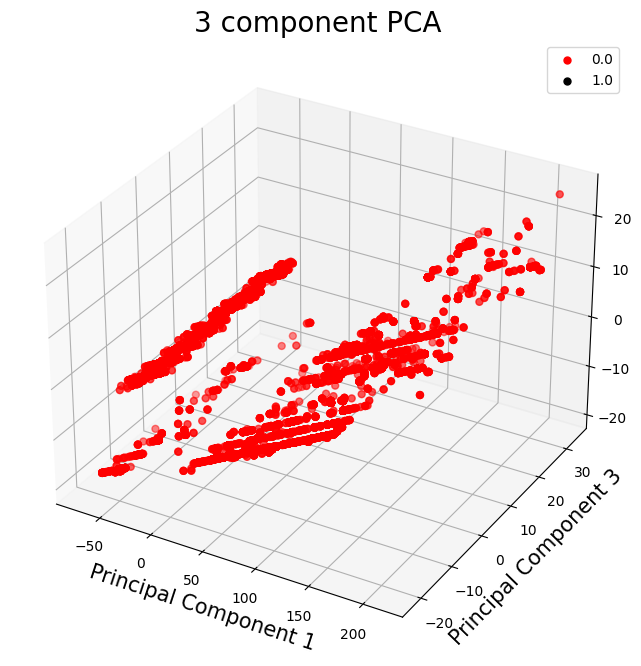

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_components_df = pca.fit_transform(df[df.columns.difference([TARGET_COLUMN])])
pca_df = pd.DataFrame(data=pca_components_df, columns=['c-1', 'c-2', 'c-3'])
pca_df[TARGET_COLUMN] = df[TARGET_COLUMN]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = df[TARGET_COLUMN].unique()
colors = ["red", "black"]
for target, color in zip(targets, colors):
    target_index = pca_df.loc[pca_df[TARGET_COLUMN] == target].index
    ax.scatter(pca_df.iloc[target_index]['c-1'],
               pca_df.iloc[target_index]['c-2'],
               pca_df.iloc[target_index]['c-3'],
               c = color,
               s = 25)
ax.legend(targets)
ax.grid()

### Building model

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_estimators': [5, 10, 15, 20, 25],
    'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': ['sqrt','log2'],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'random_state' : [0]
}

X, y = df.drop(TARGET_COLUMN, axis=1), df[TARGET_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = GridSearchCV(estimator=RandomForestClassifier(), 
                          param_grid=param_grid, 
                          cv=3, 
                          n_jobs=-1, 
                          verbose=2)
best_model.fit(X_train, y_train)
best_model.best_params_

Fitting 3 folds for each of 300 candidates, totalling 900 fits


{'max_depth': 9,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 15,
 'random_state': 0}

In [24]:
best_params = {
    'max_depth': 9,
    'max_features': 'sqrt',
    'max_samples': 0.1,
    'n_estimators': 15,
    'random_state': 0
}

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

feature_scores = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

target__event_name_Order                                  0.324075
target__event_name_Subscription Premium                   0.213325
target__event_name_Subscription Premium Renew             0.165693
categorical__event_platform                               0.153419
target__event_name_Transaction Refund                     0.064466
categorical__user_state                                   0.056305
categorical__device_model                                 0.015263
target__event_name_Sign Up Success                        0.003102
categorical__device_manufacture                           0.001981
target__event_name_Email Confirmation Success             0.000764
target__event_name_Add Vehicle Success                    0.000529
target__event_name_Account History Transaction Details    0.000459
target__event_name_Wallet Opened                          0.000307
target__event_name_Chat Conversation Opened               0.000212
target__event_name_Add Payment Method Failed              0.00

In [25]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4614
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00      4672
   macro avg       1.00      1.00      1.00      4672
weighted avg       1.00      1.00      1.00      4672

